In [121]:
import pandas as pd
import seaborn as sns

In [141]:
df=pd.read_csv('dataset.csv')

In [142]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [143]:
df['oldpeak'].astype(int)

0      2
1      3
2      1
3      0
4      0
      ..
298    0
299    1
300    3
301    1
302    0
Name: oldpeak, Length: 303, dtype: int64

In [144]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [145]:
num_columns=['age','sex','cp','trestbps','chol','fbs','resteg','talach','exang','oldpeak','slope','ca','thal','target']

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [147]:
X=df.drop(labels=['target'],axis=1)
Y=df.target

In [148]:



from sklearn.model_selection import train_test_split

In [149]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.30)

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
RMclassifier=RandomForestClassifier()

In [152]:
params={'max_depth':[10],
       'criterion':['gini','entropy']}

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [154]:
CV=RandomizedSearchCV(RMclassifier,param_distributions=params,scoring='accuracy',cv=5,verbose=5)

In [155]:
CV.fit(X_train,Y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ......criterion=gini, max_depth=10;, score=0.814 total time=   0.2s
[CV 2/5] END ......criterion=gini, max_depth=10;, score=0.814 total time=   0.2s
[CV 3/5] END ......criterion=gini, max_depth=10;, score=0.762 total time=   0.2s
[CV 4/5] END ......criterion=gini, max_depth=10;, score=0.905 total time=   0.2s
[CV 5/5] END ......criterion=gini, max_depth=10;, score=0.738 total time=   0.2s
[CV 1/5] END ...criterion=entropy, max_depth=10;, score=0.860 total time=   0.2s
[CV 2/5] END ...criterion=entropy, max_depth=10;, score=0.814 total time=   0.2s
[CV 3/5] END ...criterion=entropy, max_depth=10;, score=0.762 total time=   0.2s
[CV 4/5] END ...criterion=entropy, max_depth=10;, score=0.905 total time=   0.2s
[CV 5/5] END ...criterion=entropy, max_depth=10;, score=0.738 total time=   0.2s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10]},
                   scoring='accuracy', verbose=5)

In [156]:
CV.best_params_

{'max_depth': 10, 'criterion': 'entropy'}

In [157]:
models
={'Randomforest':RandomForestClassifier()}

SyntaxError: invalid syntax (1814599935.py, line 2)

In [ ]:
def evalute_model(X_train,Y_train,X_test,Y_test,models):
    report={}
    for i in range(len(models)):
        
        model=list(models.values())[i]
            
        model.fit(X_train,Y_train)
        Y_test_pred=model.predict(X_test)
        test_model_score=accuracy_score(Y_test_pred,Y_test)
        
        report[list(models.keys())[i]]= test_model_score
        
        return report
        
        
        

In [ ]:
evalute_model(X_train,Y_train,X_test,Y_test,model)

In [ ]:
Y_pred=CV.predict(X_test)

In [158]:
f1_score(Y_pred,Y_test)



0.8080808080808082

In [159]:
precision_score(Y_pred,Y_test)

0.8

In [160]:
recall_score(Y_pred,Y_test)

0.8163265306122449

In [161]:
import matplotlib.pyplot as mlt
import seaborn as sns

KeyError: ('chol', 'trestbps', 'thalach', 'age')

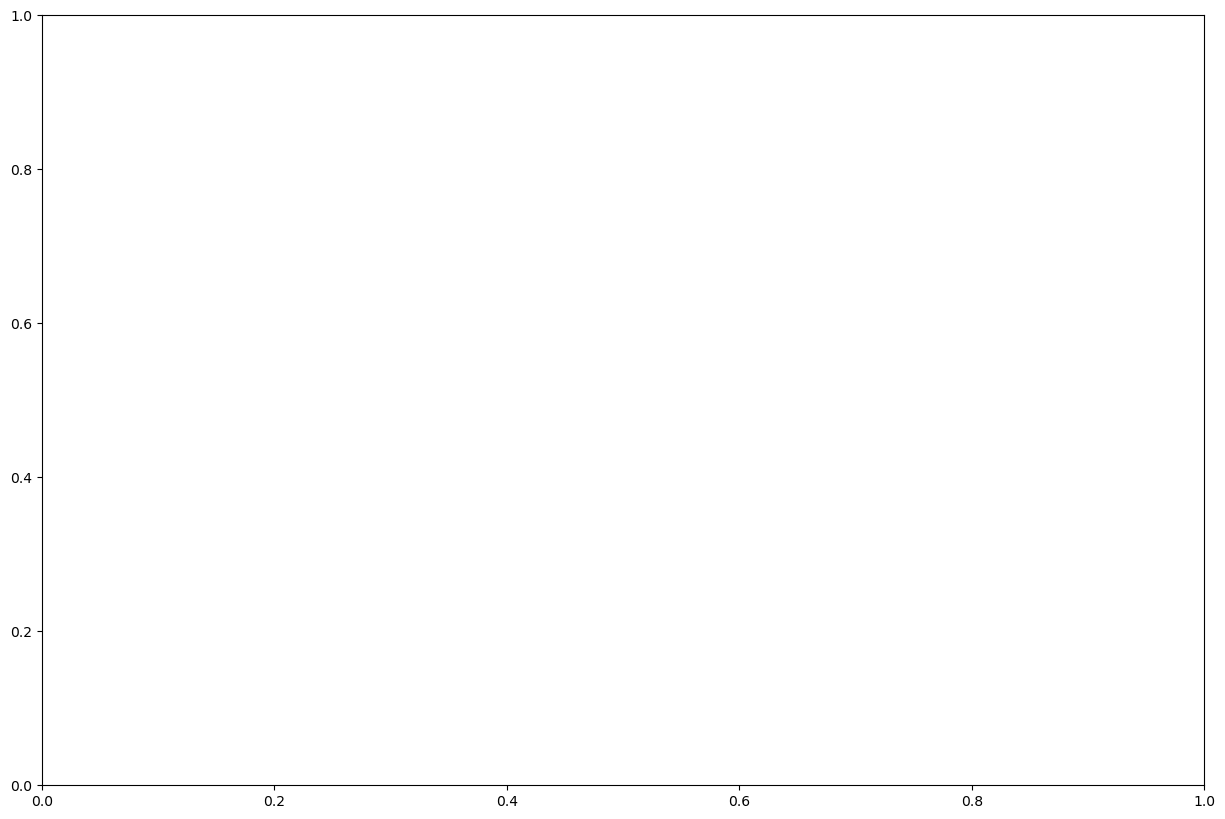

In [167]:
fig,axis=mlt.subplots(figsize=(15,10))
sns.barplot(data=df,x=X['chol','trestbps','thalach','age'])